# In which Developer Field you earn most?
## A data driven analysis of Developers salary across the whole Field for 2017

This analysis based on Stack Overflows developer survey data from 2017.

The dataset can be found at: https://insights.stackoverflow.com/survey

## 1. Imports and dataset informations

In [2]:
# Organize imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
df = pd.read_csv('../survey_results_public.csv')
schema = pd.read_csv('../survey_results_schema.csv')

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19102 entries, 0 to 19101
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 22.4+ MB


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def get_column_description(column_name, schema):
    '''
    INPUT - column_name - string - the name of the column you would like to know about
            schema - pandas dataframe with the schema of the developers survey
    OUTPUT - desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

get_column_description('HaveWorkedLanguage', schema)

'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [10]:
# Print the column names of the dataset
for col in schema['Column']:
    print(col)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

## 2. Salary differences regarding gender

### Plot a Simple gender distribution

Answer the questions how many male, female and other developer work in 2017 in the developer field. 

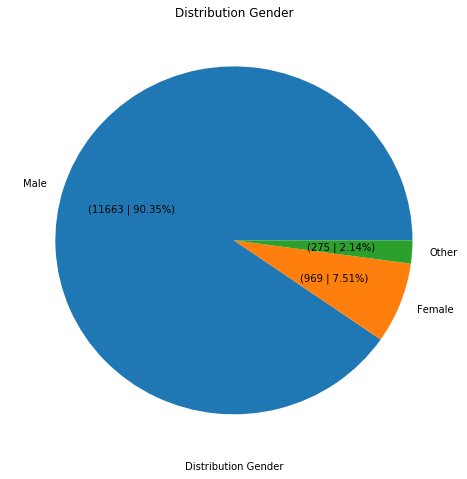

In [16]:
def plotGenderDistribution(df):
    '''
    INPUT - df - pandas dataframe with the Stack Overflows developers survey data
    Function plots the distribution of the gender as pie chart. It separates between 'Male', 'Female' and 'Others'
    '''
    df_cleaned = df[df['Gender'].isnull() == False]
    new_gender = df_cleaned['Gender'].apply(lambda x: x if (x == 'Male' or x == 'Female') else 'Other')

    series = (new_gender.value_counts()/(df_cleaned.shape[0] - sum(new_gender.isnull())));

    plt.title('Distribution Gender')
    ax = series.plot.pie(autopct=lambda x: '({} | {:.2f}%)'.format(int(x * len(new_gender) / 100), x), figsize=(8, 8))
    ax.set_ylabel('')

plotGenderDistribution(df)

### Plot bar chart distribution of the gender salary

How is the salary distribution for male and female developer. It's important to answer the questions if one of those groups earns more or less money than the other.

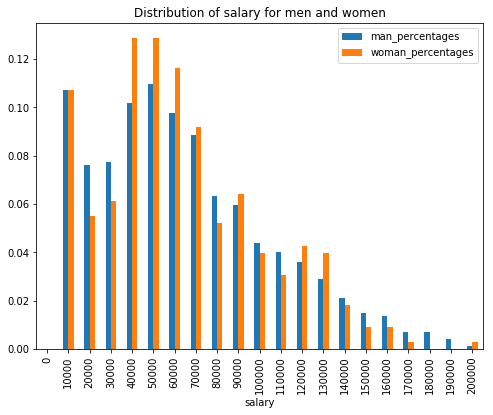

In [24]:
def plotGenderSalaryDistribution(df):
    '''
    INPUT - df - pandas dataframe with the Stack Overflows developers survey data
    Function creates a dataframe with the absolute and percentual values for 
    about 20 salary classes from 0 to 200.000 US$ for men and women and plots the 
    information in a bar chart.
    '''
    
    # get all man / woman valus
    df_men = df[df['Gender'] == 'Male']
    df_women = df[df['Gender'] == 'Female']
    
    salary = []
    man_absolutes = []
    man_percentages = []
    woman_absolutes = []
    woman_percentages = []
    
    count = 0
    salary.append(count)
    
    man_absolute = df_men[df_men['Salary'] == 0]['Salary'].count()
    man_percentage = man_absolute / df_men['Salary'].count()
    man_absolutes.append(man_absolute + 1)
    man_percentages.append(man_percentage)
    
    woman_absolute = df_women[df_women['Salary'] == 0]['Salary'].count()
    woman_percentage = woman_absolute / df_women['Salary'].count()
    woman_absolutes.append(woman_absolute)
    woman_percentages.append(woman_percentage)
    
    while (count <= 19):
        amountFrom = count * 10000
        amountTo = (count + 1) * 10000
        salary.append(amountTo)
        
        man_absolute = df_men[(df_men['Salary'] >= amountFrom) & (df_men['Salary'] < amountTo)]['Salary'].count()
        man_percentage = man_absolute / df_men['Salary'].count()
        man_absolutes.append(man_absolute)
        man_percentages.append(man_percentage)
        
        woman_absolute = df_women[(df_women['Salary'] >= amountFrom) & (df_women['Salary'] < amountTo)]['Salary'].count()
        woman_percentage = woman_absolute / df_women['Salary'].count()
        woman_absolutes.append(woman_absolute)
        woman_percentages.append(woman_percentage)
        
        count = count + 1
    
    df_plot = pd.DataFrame( columns=['salary', 'man_absolutes', 'man_percentages', 'woman_absolutes', 'woman_percentages'], 
        data = {
            'salary': salary,
            'man_absolutes': man_absolutes,
            'man_percentages': man_percentages,
            'woman_absolutes': woman_absolutes,
            'woman_percentages': woman_percentages
    })
    
    # Line Chart with percentage values
    #df_plot[['salary', 'man_percentages', 'woman_percentages']].plot(x='salary', linestyle='-', marker='o', figsize=(12, 8))
    #plt.show()

    # Bar Chart with absolute values
    # df_plot[['salary', 'man_absolutes', 'woman_absolutes']].plot(x='salary', kind='bar', figsize=(8, 6))
    # plt.show()

    # Bar Chart with percentage values
    df_plot[['salary', 'man_percentages', 'woman_percentages']].plot(x='salary', kind='bar', figsize=(8, 6), 
    title='Distribution of salary for men and women')
    plt.show()
    
plotGenderSalaryDistribution(df)


## 3. Salary differences regarding country

### Default functions

In [5]:
def plotColumnDistributionAsPie(df, column, title='', top = 10):
    '''
    INPUT - df - pandas dataframe with the Stack Overflows developers survey data
            column - string - column of dataframe that should be plotted
            title - string - title for the pie chart
            top - integer - number of countries to be plotted
    Function plots the top country distribution as pie chart
    '''
    search_vals = df[column].value_counts().nlargest(top).index.tolist()

    new_df = df[df[column].isin(search_vals)][column]
    
    series = (new_df.value_counts()/(new_df.shape[0]));

    plt.title(title)
    ax = series.plot.pie(autopct=lambda x: '({} | {:.2f}%)'.format( int(x * len(new_df) / 100), x), figsize=(8, 8))
    ax.set_ylabel('')

def plotMeanSalaryRegardingColumnAndGender(df, column, function, column_values=[], top = 10, title=''):
    '''
    INPUT - df - pandas dataframe with the Stack Overflows developers survey data
            column - string - column that should be used to for counting appearance
            function - funtion - function that should be used to count salary
            column_values - list - list of possible column values; is used when set instead of top ranking of column
            top - integer - number of countries to be plotted
            title - string - title of the plot
    Function plots the mean salary for male and female developer in the top x countries with most developers 
    or the possible column_values as bar chart.
    '''
    # get all man / woman valus
    df_men = df[df['Gender'] == 'Male']
    df_women = df[df['Gender'] == 'Female']
    
    male = []
    female = []
    
    if not column_values:
        column_values = df[column].value_counts().nlargest(top).index.tolist()
    
    for column_value in column_values:
        male.append(function(df_men, column, column_value))
        female.append(function(df_women, column, column_value))

    df_plot = pd.DataFrame( columns=['column', 'male', 'female'], 
        data = {
            'column': column_values,
            'male': male,
            'female': female
    })

    # Bar Chart with percentage values
    df_plot[['column', 'male', 'female']].plot(x='column', kind='bar', figsize=(8, 6), title=title)
    plt.show()
    
def getColumnSalaryMeanEqual(df, df_column, column_value):
    '''
    INPUT - df - pandas dataframe with the to be observed data
            df_column - string - dataframe column that should be observed
            column_value - string - value that should be treatened
    OUTPUT - mean salary of the df_column where rows equal column_value
    '''
    return df[df[df_column] == column_value]['Salary'].mean()

def getColumnSalaryMeanContain(df, df_column, column_value):
    '''
    INPUT - df - pandas dataframe with the to be observed data
            df_column - string - dataframe column that should be observed
            column_value - string - value that should be treatened
    OUTPUT - mean salary of the df_column where rows contain column_value
    '''
    return df[df.DeveloperType.str.contains(column_value, na=False)]['Salary'].mean()

### Plot a Simple country distribution

Answer the question of what are the top 10 countries with the most developers.

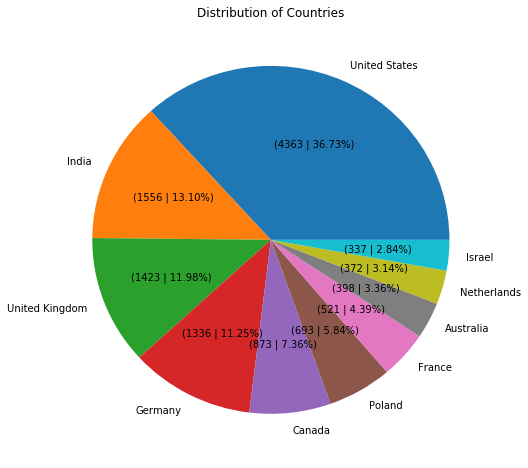

In [6]:
plotColumnDistributionAsPie(df, 'Country', title='Distribution of Countries')   

### Plot mean salary regarding countries and gender

How is the mean salary for male and female developer in the top 10 countries with most developers.

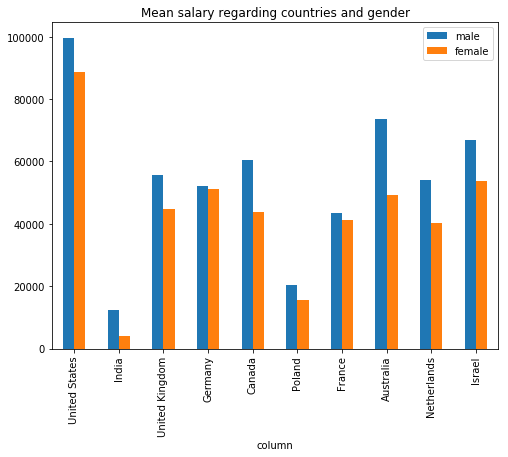

In [7]:
plotMeanSalaryRegardingColumnAndGender(df, 'Country', getColumnSalaryMeanEqual, 
                                       title = 'Mean salary regarding countries and gender')

## 4. Salary differences regarding formal education

### Simple formal education pie chart distribution

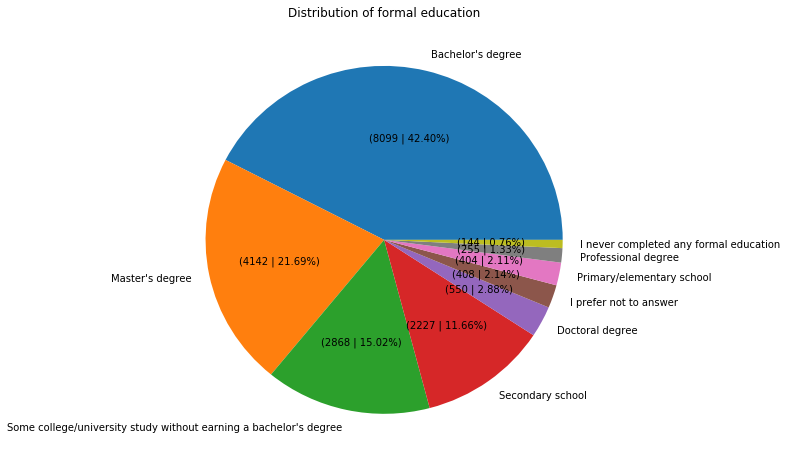

In [8]:
plotColumnDistributionAsPie(df, 'FormalEducation', title='Distribution of formal education')

### Plot mean salary regarding formal education and gender

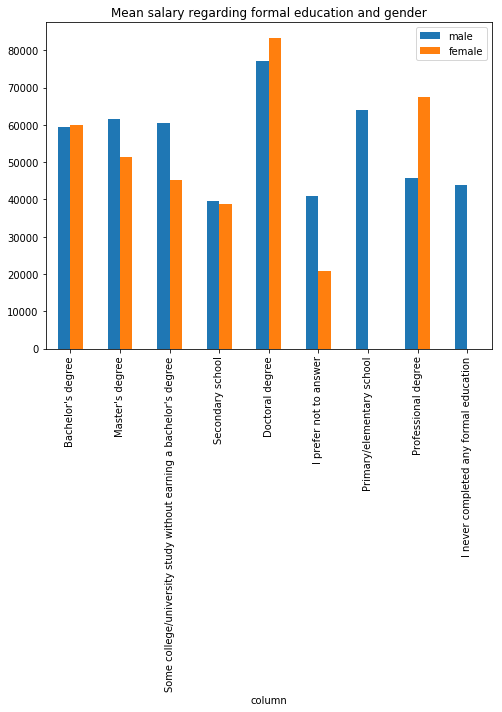

In [9]:
plotMeanSalaryRegardingColumnAndGender(df, 'FormalEducation', getColumnSalaryMeanEqual, 
                                       title = 'Mean salary regarding formal education and gender')

## 5. Salary differences regarding formal education

The column DeveloperType is a multi select column with semicolon separated values. Because of this it' important to write a default function checking the apperance of different developement types in each row. 

In [64]:
def searchValuesInEachRow(frame, col, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count and the percentage of how often it shows up
    '''
    df = frame[col].value_counts().reset_index()
    col1 = 'index'
    
    from collections import defaultdict
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col]
    new_df.sort_values(col, ascending=False, inplace=True)
    
    #new_df['percent'] = new_df[col]/np.sum(new_df[col])
    return new_df

### Simple developer type pie chart distribution

Text(0,0.5,'')

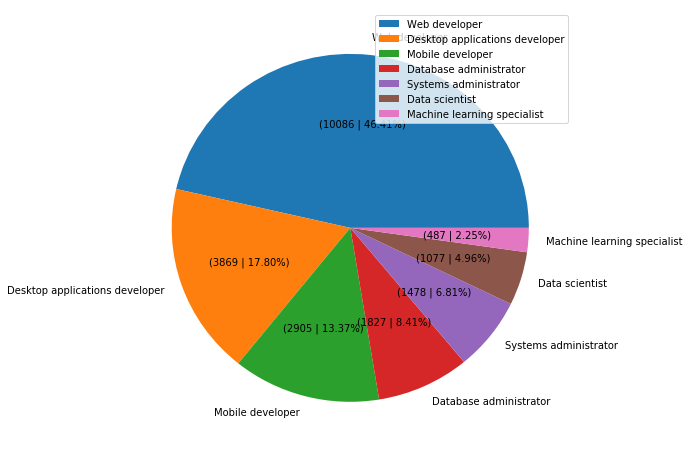

In [65]:
#HaveWorkedLanguage
#DeveloperType

possible_vals = ['Web developer','Desktop applications developer','Mobile developer','Systems administrator',
                 'Database administrator','Data scientist','Machine learning specialist']

study_df = searchValuesInEachRow(df, 'DeveloperType', possible_vals)

ax = study_df.plot.pie(figsize=(8, 8), y='DeveloperType', labels=study_df['index'], 
                       autopct=lambda x: '({} | {:.2f}%)'.format(int(x * study_df.DeveloperType.sum() / 100), x))
ax.set_ylabel('')

### Plot mean salary regarding developer type and gender

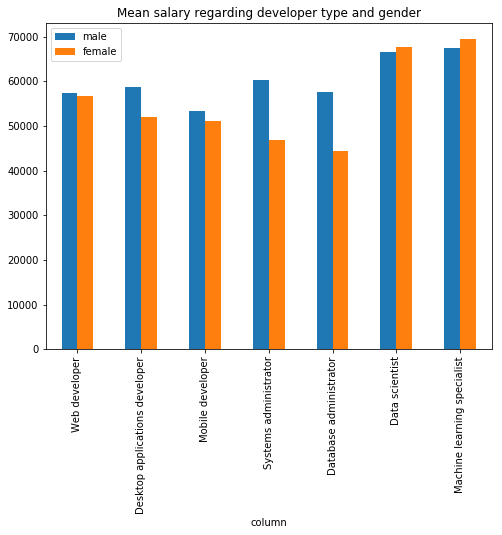

In [63]:
plotMeanSalaryRegardingColumnAndGender(df, 'DeveloperType', getColumnSalaryMeanContain, iterList = possible_vals,
                                       title = 'Mean salary regarding developer type and gender')